In [6]:
import turicreate
import matplotlib.pyplot as plt

In [7]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
sleep_data = turicreate.SFrame(url)

Read 25 lines. Lines per second: 127.877

Finished parsing file https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

Parsing completed. Parsed 25 lines in 0.207516 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

Parsing completed. Parsed 25 lines in 0.110922 secs.

In [8]:
sleep_data

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81
2.7,25


In [11]:
sleep_data.show()

Materializing SFrame

In [12]:
training_set, test_set = sleep_data.random_split(.8,seed=0)

In [13]:
hours_model = turicreate.linear_regression.create(training_set,target='Scores',features=['Hours'])

Linear regression:

--------------------------------------------------------

Number of examples          : 23

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.000331     | 9.858140           | 5.346648                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [14]:
print (test_set['Scores'].mean())

68.0


In [15]:
print (hours_model.evaluate(test_set))

{'max_error': 6.310581199002016, 'rmse': 5.9403025909477325}


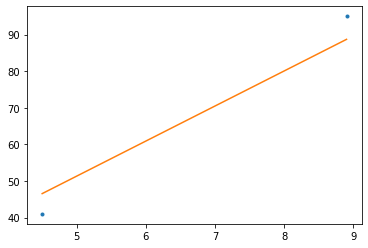

In [25]:
plt.plot(test_set['Hours'],test_set['Scores'],'.',
        test_set['Hours'],hours_model.predict(test_set),'-')

In [32]:
new_data = {'Hours': [9.25]}
print (hours_model.predict(turicreate.SFrame(new_data)))

[92.0417875655242]


In [33]:
hours_new_model = turicreate.linear_regression.create(sleep_data,target='Scores',features=['Hours'])

Linear regression:

--------------------------------------------------------

Number of examples          : 25

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.000167     | 10.507965          | 5.374495                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [34]:
print (hours_new_model.predict(turicreate.SFrame(new_data)))

[92.82475804446923]
